<H1><center>Project 1<BR><BR>
Classification with <em>k</em> Nearest Neighbors</center></H1>

<H2>Task 1: Companies use of machine learning to target advertisements
</H2>

<P>Read <a href="https://www.forbes.com/sites/kashmirhill/2012/02/16/how-target-figured-out-a-teen-girl-was-pregnant-before-her-father-did/#7987f4626668">this article</a> about how data and machine learning may be used to target product advertisements at different groups of consumers. Optionally, if you are interested in a more extensive account, check out <a href="https://www.nytimes.com/2012/02/19/magazine/shopping-habits.html">this article</a> with more details.</P>

<P>Please answer (minimum 200 words) the following questions in the space below. In your opinion, is it problematic (e.g., violating someone's privacy) for companies to gather data on their customers' purchasing habits and use these data to send targeted product advertisements? Assuming a company doesn't share or sell the data, are there other ways a company might use data on customers' shopping habits that you would consider to be problematic?</P>

** Response: **
Yes, I believe it is in violation of an individual's privacy for companies to collect data on customer habits and use it for targeted advertising. My primary objection is that companies are capitalizing on consumers not just in the direct form of revenue from what they buy but also in a way a consumer cannot necessarily opt out of: consuming itself. In CS 234, we studied the 3 ethical principles of the Belmont Report which speak to 1) respect for persons, 2) beneficence, and 3) justice. I believe data collection violates the respect for persons principle because it limits an individual's autonomy, especially in the present day when it is increasingly hard to separate ourselves from products and services that seem to have transformed from convenience to necessity. The linked article mentions other ways that companies internally use data that I also consider to be problematic. I think the examples where companies have gotten slyer about sneaking in targeted advertisement are interesting because the companies seem to recognize that what they are doing is morally flawed, at least to the extent that they can no longer be so blatant about it. Even if a company isn't selling or sharing the data, the fact that they have it and can make assumptions (true or not) about people is problematic.

<H2>Task 2: Classifying diabetes with <em>k</em>NN
</H2>

<P>Together with the downloaded file containing this notebook, you should find three comma-separated values (csv) files named <code>diabetes_training.csv</code>, <code>diabetes_validation.csv</code>, and <code>diabetes_testing.csv</code>, corresponding to training, validation, and testing data, respectively. The first row of each file contains header information. Each subsequent row represents a person of <a href="https://en.wikipedia.org/wiki/Pima_people">Pima</a> Native American heritage, with feature values separated by commas. The very last column is the label, 0 or 1, which denotes whether or not that person has diabetes. The rest of the columns are, in order,</P>
<ol>
<li>Number of times pregnant</li>
<li>Plasma glucose concentration at 2 hours in an oral glucose tolerance test</li>
<li>Diastolic blood pressure (mm Hg)</li>
<li>Triceps skin fold thickness (mm)</li>
<li>2-Hour serum insulin (mu U/ml)</li>
<li>Body mass index (weight in kg/(height in m)^2)</li>
<li>Diabetes pedigree function</li>
<li>Age (years)</li>
</ol>
<P>In this task, you will work with the <em>k</em> nearest neighbors algorithm and use it to predict whether someone has diabetes based on various diagnostic measurements.</P>

<P>Write a function <code>load</code> that takes a <code>csv</code> file as input, reads in the file, and returns a tuple <code>(X, y)</code>, where <code>X</code> is a data matrix corresponding to the feature values and <code>y</code> is a vector corresponding to the labels. Your function should ignore the first (header) row of the file and it should assume that the labels are in the final column in the file.</P>

In [62]:
import numpy as np

def load(csv_file):
    """given a CSV file where each row is a data point,
    with the last column being the label and the rest being the vector,
    return a tuple consisting of two elements:
    (1) a matrix where each row is a vector, in the same order as they appear in the file
    (2) an array where the ith element is the label of the ith vector above.
    """
    data = []
    result = []
   
    file = np.loadtxt(open(csv_file, "rt"), delimiter=",", skiprows=1)

    for row in file: 
        data.append(list(row[0:-1]))
        result.append(row[-1])
    
    return data, result
xtrain, ytrain = load("diabetes_training.csv") #testing
xtest, ytest = load("diabetes_testing.csv")
ytest = [int(x) for x in ytest]
xval, yval = load("diabetes_validation.csv")

<P>As with any code that you write, it is <em>strongly</em> recommended that you test your code. For example, with your <code>load</code> function above, you might want to invoke the function on one of the diabetes files and print out the dimensions of the returned <code>X</code> and <code>y</code> matrices as well as the first few rows of each. You can then compare this printed out information to the data in the file by opening up the file (e.g., with a spreadsheet program) and viewing the contents of the file.</P>

<P>Write a function <code>knn_predict</code> that takes three parameters, a training data matrix, the associated labels for the training data, and a testing data matrix. Using the <em>k</em> nearest neighbors algorithm, the function should return an array containing the predicted labels of each row (in order) for the testing data matrix. The function need only work for <em>k</em>=1 and the Euclidean distance metric (i.e., the L2 norm). While not part of this project, if you want to challenge yourself, implement the function so that it works for different values of <em>k</em> or different distance metrics. You should <font color='red'><em>not</em></font> perform any feature scaling in this task (that will come in Task 4 :).</P>
<P>Your function may use <code>numpy</code> functions such as <code>numpy.linalg.norm</code>, which calculates distances, but it may <font color='red'><em>not</em></font> use any functions from <code>sklearn</code>! You may use helper functions as you deem appropriate.
</P>

In [63]:
from scipy.spatial.distance import cdist
from scipy.stats import mode

def knn_predict(trainX, trainY, testX, k):
    dist = cdist(trainX, testX,'euclidean')
    partition = np.argpartition(dist, k, axis=0)[:k]
    nearest_dist = np.take(trainY, partition)
    nearOrNot = mode(nearest_dist,axis=0)[0]
    
    nearOrNot = nearOrNot.tolist()
    flat_list = []
    for sublist in nearOrNot:
        for item in sublist:
            flat_list.append(item)
    pred = [int(x) for x in flat_list]
    return pred
ypred = knn_predict(xtrain,ytrain,xtest,1)

<P>Write a function <code>get_accuracy</code> that takes an array of true labels and an array of predicted labels and returns the relative accuracy, i.e., the percentage of labels in common between the two arrays.</P>

In [64]:
def get_accuracy(y_true, y_predicted):
    """returns the fraction of correct predictions in y_predicted compared to y_true"""
    count = 0
    for i in range(len(y_true)):  
        if(int(y_true[int(i)]) == int(y_predicted[int(i)])):
            count += 1
    return count/len(y_true)
get_accuracy(ytest,ypred)

0.6538461538461539

<P><font color="maroon"><u>What is the accuracy of your <em>k</em> nearest neighbors algorithm (using <em>k</em>=1 and the Euclidean distance metric) on the diabetes test data?</u></font></P>

Report your accuracy here: 65.38%

<H2>Task 3: Hyperparameter tuning with <em>k</em>NN
</H2>

<P>In this task, you will use the validation data to explore the hyperparameter space of the <em>k</em>NN approach. Above, you implemented your own <em>k</em>NN classification approach. Here, we will use the <code>sklearn</code> <em>k</em>NN classification approach, as it allows setting different distance metrics and different values for <em>k</em>, which your approach may not have done. To start, write a function <code>sklearn_knn_predict</code> that uses <code>sklearn</code>'s <code>KNeighborClassifier</code> to make classification predictions. The function should have five inputs: a set of training data, a set of training labels, a set of evaluation data, a distance metric such as 'euclidean' or 'manhattan', and a value for <em>k</em>. The function should return an array of classification predictions. When creating an <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn.neighbors.KNeighborsClassifer</a> instance, you should provide three inputs: <code>algorithm='brute'</code> uses the same <em>k</em>NN algorithm that you implemented above, <code>metric=distance_metric</code> uses the distance metric provided as input to your <code>sklearn_knn_predict</code> function, and <code>n_neighbors=k</code> uses the value of <em>k</em> provided as input to your <code>sklearn_knn_predict</code> function. You should <font color='red'><em>not</em></font> perform any feature scaling in this task (that will come in Task 4 :).
</P>

In [65]:
from sklearn.neighbors import KNeighborsClassifier
def sklearn_knn_predict(trainX, trainY, testX, distance_metric, k):
    model = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
    model.fit(trainX, trainY)
    pred = model.predict(testX)
    pred = [int(x) for x in pred]
    return pred
ypred = sklearn_knn_predict(xtrain, ytrain, xtest, "euclidean", 1)
get_accuracy(ytest,ypred)

0.6538461538461539

<P><font color="maroon"><u>What is the accuracy of the <code>sklearn</code> <em>k</em> nearest neighbors algorithm (using <em>k</em>=1 and the Euclidean distance metric) on the diabetes test data?</u></font></P>

Report your accuracy here: 65.38%

<P>Define a function <code>knn_grid_search</code> that takes as input the training data vectors <code>trainX</code>, the associated training labels <code>trainy</code>, the validation data <code>validationX</code>, the associated validation labels <code>validationy</code>, a list of distance metrics, and list of values for <em>k</em>. For each distance metric and value of <em>k</em>, the function should train a <em>k</em>NN classifier on the training data and test its accuracy on the validation data. It should return a dictionary mapping each <code>(metric, k)</code> tuple such as <code>('euclidean', 3)</code> to the validation accuracy for those two parameters.
</P>

In [66]:
from collections import defaultdict
def knn_grid_search(trainX, trainy, validationX, validationy, distance_metric_list, n_neighbors_list):
    classifyDict = defaultdict()
    
    for j in distance_metric_list:
        for k in n_neighbors_list:
            ypred = sklearn_knn_predict(trainX,trainy,validationX,j,k)
            acc = get_accuracy(validationy,ypred)
            classifyDict[(j,k)] = acc
    return classifyDict

scores = knn_grid_search(xtrain,ytrain,xval,yval,["euclidean","manhattan"], [1,3,5,7,9,11,13,15,17,19])
scores
import operator
key = max(scores.items(), key=operator.itemgetter(1))
print(key)

(('euclidean', 11), 0.7843137254901961)


<P>Consider two distance metrics, 'euclidean' and 'manhattan', and the following ten values for <em>k</em>: 1,3,5,7,9,11,13,15,17,19. For these possible hyperparameter values, print out the distance metric and value for <em>k</em> that correspond to the highest accuracy of the <em>k</em>NN classifier on the validation data. Also, print out the accuracy of the classifier on the <em>test</em> data using this pair of parameters.</P>

In [67]:
metric, k = key[0][0], key[0][1]
validation_accuracy = key[1]
print('The best parameters are metric =', metric, 'and k =', k, 'with', validation_accuracy, 'accuracy on the validation data')

ypredT = sklearn_knn_predict(xtrain, ytrain, xtest, metric, k)
test_accuracy = get_accuracy(ytest,ypredT)
print('Test accuracy:', test_accuracy)

The best parameters are metric = euclidean and k = 11 with 0.7843137254901961 accuracy on the validation data
Test accuracy: 0.7243589743589743


<P>As a final step for this task, create a plot containing two line graphs, one corresponding to the accuracy of the <em>k</em>NN approach using different values of <em>k</em> with the <code>euclidean</code> distance metric, and one corresponding to the accuracy of the <em>k</em>NN approach using different values of <em>k</em> with the <code>manhattan</code> distance metric.
</P>

Text(0,0.5,'Accuracy')

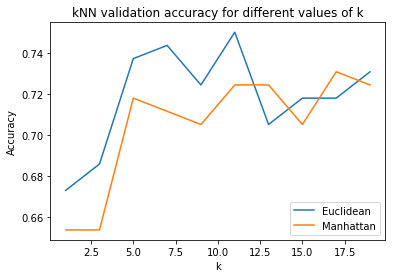

In [76]:
import matplotlib.pyplot as plt

euc = []
man = []
ks = [1,3,5,7,9,11,13,15,17,19]

for k in ks:
    ypredEUC = sklearn_knn_predict(xtrain, ytrain, xtest, "euclidean", k)
    accEUC = get_accuracy(ytest,ypredEUC)
    man.append((k, accEUC))
    
for k in ks:
    ypredMAN = sklearn_knn_predict(xtrain, ytrain, xtest, "manhattan", k)
    accMAN = get_accuracy(ytest,ypredMAN)
    euc.append((k, accMAN))

    
plt.plot(*zip(*euc), label="Euclidean")
plt.plot(*zip(*man), label="Manhattan")
plt.legend(loc='lower right')
plt.title("kNN validation accuracy for different values of k")
plt.xlabel("k")
plt.ylabel("Accuracy")

<P>Your plot of line graphs might looking something like this:<BR>
<center><img src="kNN.png"></img></center>

<H2>Task 4: Feature Scaling
</H2>

<P>In the tasks above, you did not perform feature scaling prior to classifying the data.  Here, you will perform feature scaling on the diabetes data before classifying it. Using the <code>fit</code> function of <code>sklearn</code>'s <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler">preprocessing.StandardScaler</a> class, you can learn the means and standard deviations of the features in the <em>training</em> data. Then, using the <code>transform</code> function on your trained <code>preprocessing.StandardScaler</code> object, you can scale first the <em>training</em> data and then the <em>testing</em> data. 
</P>

In [69]:
# Fit a preprocessing.StandardScaler object with the diabetes training data.
# Then scale (i.e., transform) first the training data and then the testing data.
import csv
    
scaler = StandardScaler()
scaler.fit(xtrain)
StandardScaler(copy=True, with_mean=True, with_std=True)
sXTrain = scaler.transform(xtrain)
sXTest = scaler.transform(xtest)

In [70]:
# Train an sklearn KNeighborsClassifier using the scaled training data
# and determine its accuracy on the scaled testing data (using k=1 and Euclidean distance).

ypred = sklearn_knn_predict(sXTrain, ytrain, sXTest, "euclidean", 1)
get_accuracy(ytest,ypred)

0.7435897435897436

<P><font color="maroon"><u>Now that you have performed feature scaling prior to classification, what is the accuracy of the <code>sklearn</code> <em>k</em> nearest neighbors algorithm (using <em>k</em>=1 and the Euclidean distance metric) on the diabetes test data? Is this accuracy better or worse than you found at the beginning of Task 3 when feature scaling was <b>not</b> used?</u></font></P>

Report your accuracy here: 74.36%
Better or worse than accuracy in earlier task when feature scaling was not used: Better than before feature scaling (ie: vs. 65%)

<H2>Submitting your work
</H2>

<P><font color="maroon"><u>Please indicate your name and the names of any partner that worked with you on this project:</u></font></P>

Name(s): Shreya Parjan

<P><font color="maroon"><u>Please indicate anyone else that you collaborated with in the process of doing the project:</u></font></P>

Collaborators: Emily Yin

<P><font color="maroon"><u>If you or your partner is using a late coupon, please indicate who is using the coupon and how many coupons:</u></font></P>

Late coupons: 

<P><font color="maroon"><u>When working on this project, approximately how many hours did you spend on each of (1) Task 1, (2) Task 2, (3) Task 3, (4) Task 4, and (5) Total?</u></font></P>

Hours for Task 1: 30 minutes

Hours for Task 2: 2

Hours for Task 3: 3

Hours for Task 4: 30 minutes

Total Hours: 6

<P><font color="maroon"><u>When working on this project, did you abide by the <a href="https://www.wellesley.edu/studentlife/aboutus/honor">Honor Code</a> and is all of the work that you are submitting your own and/or your partner's?</u></font></P>

Abided by Honor Code: Yes

<P><font color="maroon"><u>To submit this project, please upload your <code>Project1.ipynb</code> file to the <code>Project1</code> folder that the instructor created and shared with you in your Google drive.</u></font></P>